# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
price_fmt = StrMethodFormatter("${x:,.0f}")

# Loading data

In [3]:
# Load in the csv.gz's of results for years 2000 and 2001
df_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
df_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

In [4]:
combined_df = df_2000.append(df_2001)

C:\Users\black\AppData\Local\Temp\ipykernel_12028\878589659.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = df_2000.append(df_2001)


In [5]:
combined_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2247.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
1384,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
1385,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR
1386,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.000,2.0,NaN


In [6]:
combined_df.to_csv("Data/tmdb_results_combined.csv.gz", compression = "gzip", index =False)

# Light EDA

## Number of movies with some financial information

In [7]:
financial_filter = (combined_df['budget'] > 0) | (combined_df['revenue'] > 0)
combined_df_financial_filtered = combined_df.loc[financial_filter]
print(f"{len(combined_df_financial_filtered)} movies has at least some financial information")

641 movies has at least some financial information


In [8]:
combined_df_financial_filtered

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2247.0,PG
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.099,186.0,R
10,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,99.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,239.0,NaN
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.600,15.0,NaN
1299,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Among Thieves,0.0,0.000,0.0,NaN
1313,tt2957918,0.0,NaN,NaN,2000.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,602589.0,en,Toaster,...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Now is not the time for toast.,Toaster,0.0,0.000,0.0,NaN
1349,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Among Thieves,0.0,0.000,0.0,NaN


## Number of movies has certification categories (G/PG/PG-13/R)

In [9]:
combined_df_financial_filtered['certification'].value_counts()

R        232
PG-13    131
PG        35
NR        17
G         15
Name: certification, dtype: int64

In [10]:
filtered_certifications = combined_df_financial_filtered[combined_df_financial_filtered['certification'].isin(['G', 'PG', 'PG-13', 'R'])]['certification']

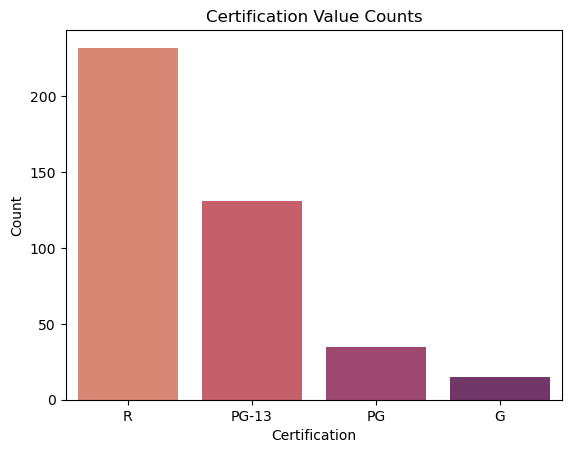

In [11]:
value_counts = filtered_certifications.value_counts()
# Plotting the value counts as a barplot using Seaborn
sns.barplot(x=value_counts.index, y=value_counts.values, palette='flare')
plt.xlabel('Certification')
plt.ylabel('Count')
plt.title('Certification Value Counts')
plt.show()

## Average revenue per certification category

In [12]:
rev_mean = combined_df_financial_filtered.groupby('certification')['revenue'].mean()
rev_mean

certification
G        1.173648e+08
NR       9.588674e+06
PG       1.106791e+08
PG-13    9.928786e+07
R        3.266001e+07
Name: revenue, dtype: float64

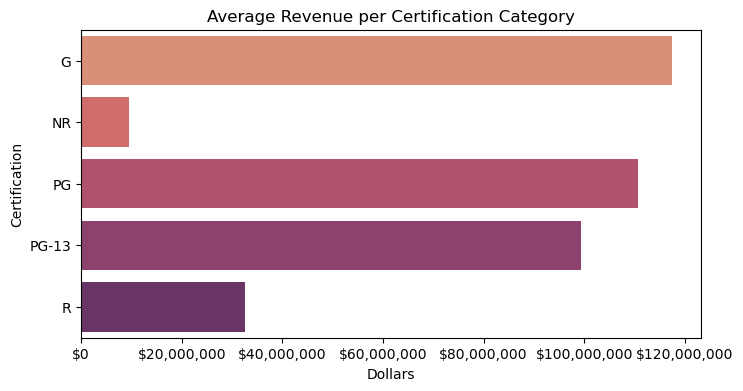

In [13]:
rev_mean_df = rev_mean.reset_index()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=rev_mean_df, y='certification', x='revenue', orient ='h', palette='flare')
plt.ylabel('Certification')
plt.xlabel('Dollars')
plt.title('Average Revenue per Certification Category')
ax.xaxis.set_major_formatter(price_fmt)
plt.show();

## Average budget per certification category

In [14]:
bud_mean = combined_df_financial_filtered.groupby('certification')['budget'].mean()
bud_mean

certification
G        3.813333e+07
NR       6.302358e+06
PG       4.482849e+07
PG-13    4.299357e+07
R        1.945174e+07
Name: budget, dtype: float64

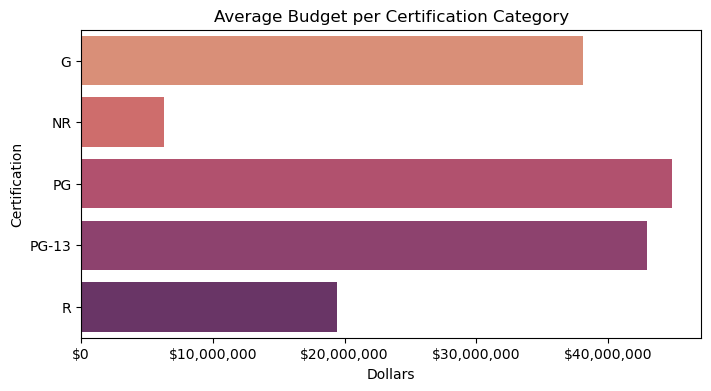

In [15]:
bud_mean_df = bud_mean.reset_index()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=bud_mean_df, y='certification', x='budget', orient ='h', palette='flare')
plt.ylabel('Certification')
plt.xlabel('Dollars')
plt.title('Average Budget per Certification Category')
ax.xaxis.set_major_formatter(price_fmt)
plt.show();